<a href="https://colab.research.google.com/github/sushma-snk/Recommendation_System/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [41]:
import pandas as pd
import numpy as np

In [42]:
movies_data = pd.read_csv('/gdrive/My Drive/unikaksha/mini_projects/Recommendation_System/movies.csv')
ratings_data = pd.read_csv('/gdrive/My Drive/unikaksha/mini_projects/Recommendation_System/ratings.csv')
tags_data = pd.read_csv('/gdrive/My Drive/unikaksha/mini_projects/Recommendation_System/tags.csv')

In [43]:
print(movies_data.head())
print("___________________________________")
print(ratings_data.head())
print("___________________________________")
print(tags_data.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
___________________________________
   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
___________________________________
   userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      

In [44]:
print(movies_data.info())
print("___________________________________")
print(ratings_data.info())
print("___________________________________")
print(tags_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
None
___________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB
None
___________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ---

In [45]:
print(movies_data.isnull().sum())
print("___________________________________")
print(ratings_data.isnull().sum())
print("___________________________________")
print(tags_data.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
___________________________________
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
___________________________________
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


In [46]:
tag_data = tags_data.dropna()

In [47]:
print(movies_data.shape)
print(ratings_data.shape)
print(tag_data.shape)

(27278, 3)
(1048575, 4)
(465548, 4)


In [48]:
movies_ratings = movies_data.merge(ratings_data[['userId', 'movieId', 'rating', 'timestamp']], on = 'movieId')
movies_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821
...,...,...,...,...,...,...
1048570,130219,The Dark Knight (2011),Action|Crime|Drama|Thriller,1339,4.5,1426852156
1048571,130462,The Boy (2015),(no genres listed),5731,4.0,1427217650
1048572,130490,Insurgent (2015),Action|Romance|Sci-Fi,2423,1.0,1426887819
1048573,130490,Insurgent (2015),Action|Romance|Sci-Fi,3397,3.5,1427491739


In [49]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   movieId    1048575 non-null  int64  
 1   title      1048575 non-null  object 
 2   genres     1048575 non-null  object 
 3   userId     1048575 non-null  int64  
 4   rating     1048575 non-null  float64
 5   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 56.0+ MB


In [50]:
print(movies_ratings.isnull().sum())

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64


In [51]:
final_dataset = movies_ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,5.0,4.5
2,3.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,NaN,4.0,NaN,NaN,NaN,3.0,3.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.5,NaN,NaN,NaN,NaN


In [52]:
final_dataset.fillna(0, inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,4.5
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0,0.0


In [53]:
user_count = movies_ratings.groupby('movieId')['rating'].agg('count')
movies_count = movies_ratings.groupby('userId')['rating'].agg('count')

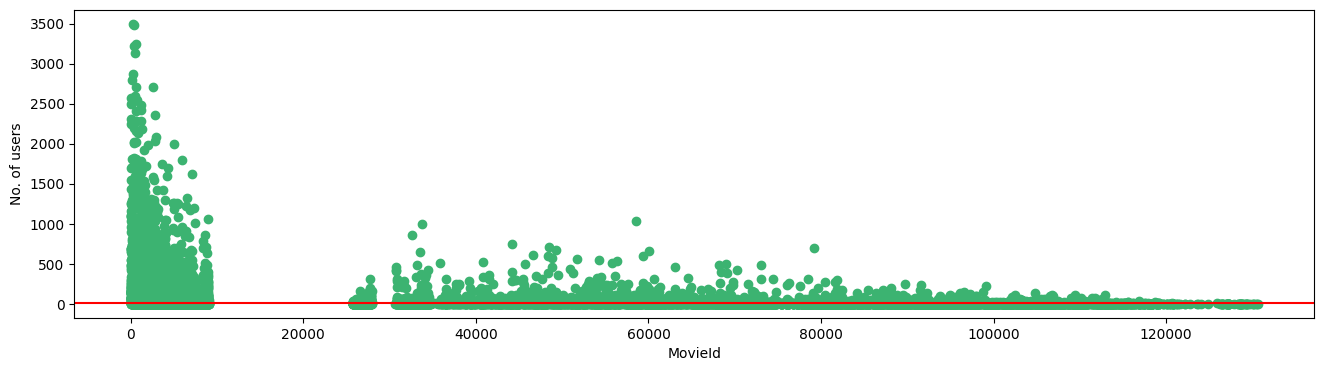

In [54]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(user_count.index, user_count, color='mediumseagreen')
plt.axhline(y=10, color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users')
plt.show()

In [55]:
final_dataset=final_dataset.loc[:,movies_count[movies_count > 50].index]
final_dataset

userId,1,2,3,5,7,8,11,13,14,16,...,7104,7105,7106,7107,7110,7111,7113,7115,7116,7117
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,...,5.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,4.0
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
from scipy.sparse import *
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [57]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [58]:
def movies_recommendation(movie_name):
    top_10_recommended_movies = 10
    movie_list = movies_ratings[movies_ratings['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=top_10_recommended_movies+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies_ratings[movies_ratings['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies_ratings.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,top_10_recommended_movies+1))
        return df
    else:
        return "No movies found. Please check your input"

In [59]:
movies_recommendation('Harry Potter')

,Title,Distance
1,Pirates of the Caribbean: The Curse of the Bla...,0.453938
2,Finding Nemo (2003),0.452476
3,"Lord of the Rings: The Two Towers, The (2002)",0.437849
4,"Monsters, Inc. (2001)",0.426383
5,Spider-Man (2002),0.408631
6,Shrek (2001),0.408332
7,"Lord of the Rings: The Fellowship of the Ring,...",0.401634
8,Harry Potter and the Goblet of Fire (2005),0.380829
9,Harry Potter and the Prisoner of Azkaban (2004),0.313990
10,Harry Potter and the Chamber of Secrets (2002),0.223880


In [60]:
movies_recommendation('Tweet')

'No movies found. Please check your input'